In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import xgboost as xgb
from sklearn.cluster import KMeans
import pickle


In [11]:
df = pd.read_csv('walmart_without_outliers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539096 entries, 0 to 539095
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        539096 non-null  int64
 1   Gender                         539096 non-null  int64
 2   Occupation                     539096 non-null  int64
 3   Marital_Status                 539096 non-null  int64
 4   Product_Category               539096 non-null  int64
 5   Purchase                       539096 non-null  int64
 6   Age_0-17                       539096 non-null  bool 
 7   Age_18-25                      539096 non-null  bool 
 8   Age_26-35                      539096 non-null  bool 
 9   Age_36-45                      539096 non-null  bool 
 10  Age_46-50                      539096 non-null  bool 
 11  Age_51-55                      539096 non-null  bool 
 12  Age_55+                        539096 non-null  bool 
 13 

In [13]:
user_id = np.unique(df['User_ID'])
train_user_id, test_user_id = train_test_split(user_id , test_size= 0.3)

In [16]:
df_train = df[df['User_ID'].isin(train_user_id)]
df_test = df[df['User_ID'].isin(test_user_id)]


In [19]:
df_train.info()
product_category = df_train['Product_Category']
purchase = df_train['Purchase']
user_id = df_train['User_ID']
df_train = df_train.drop(['User_ID', 'Purchase', 'Product_Category'] , axis = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 386325 entries, 0 to 539095
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        386325 non-null  int64
 1   Gender                         386325 non-null  int64
 2   Occupation                     386325 non-null  int64
 3   Marital_Status                 386325 non-null  int64
 4   Product_Category               386325 non-null  int64
 5   Purchase                       386325 non-null  int64
 6   Age_0-17                       386325 non-null  bool 
 7   Age_18-25                      386325 non-null  bool 
 8   Age_26-35                      386325 non-null  bool 
 9   Age_36-45                      386325 non-null  bool 
 10  Age_46-50                      386325 non-null  bool 
 11  Age_51-55                      386325 non-null  bool 
 12  Age_55+                        386325 non-null  bool 
 13  City

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386325 entries, 0 to 539095
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         386325 non-null  int64
 1   Occupation                     386325 non-null  int64
 2   Marital_Status                 386325 non-null  int64
 3   Age_0-17                       386325 non-null  bool 
 4   Age_18-25                      386325 non-null  bool 
 5   Age_26-35                      386325 non-null  bool 
 6   Age_36-45                      386325 non-null  bool 
 7   Age_46-50                      386325 non-null  bool 
 8   Age_51-55                      386325 non-null  bool 
 9   Age_55+                        386325 non-null  bool 
 10  City_Category_A                386325 non-null  bool 
 11  City_Category_B                386325 non-null  bool 
 12  City_Category_C                386325 non-null  bool 
 13  Stay

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


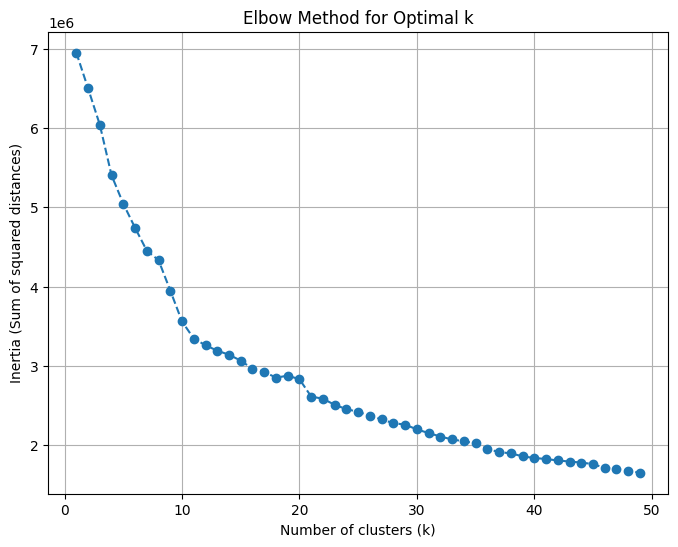

In [21]:
# applying standard scalar bcz 
# we are solving the problem through k means which more or less requires linear seperable data in nature
scalar = StandardScaler()
df_transformed = scalar.fit_transform(df_train)
inertia_values = []

k_values = range(1,50)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    inertia_values.append(kmeans.inertia_)
    print(k)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

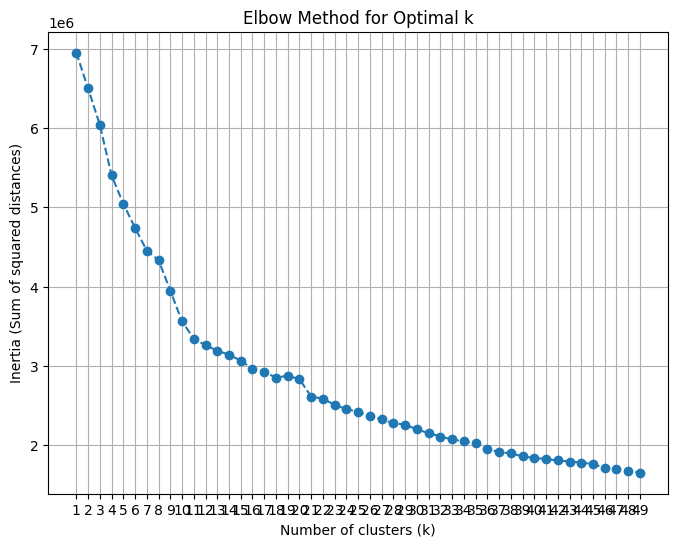

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1,50))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

From this graph, we can observe that the sharp turn comes at k = 8 ;which signifies that k should be 8 to solve the problem optimally

In [23]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_transformed)

KMeans(random_state=42)

In [25]:
labels = kmeans.predict(df_transformed)
df_train['clustter'] = labels
df_train['Purchase'] = purchase
df_train['Product_Category'] = product_category
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 386325 entries, 0 to 539095
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         386325 non-null  int64
 1   Occupation                     386325 non-null  int64
 2   Marital_Status                 386325 non-null  int64
 3   Age_0-17                       386325 non-null  bool 
 4   Age_18-25                      386325 non-null  bool 
 5   Age_26-35                      386325 non-null  bool 
 6   Age_36-45                      386325 non-null  bool 
 7   Age_46-50                      386325 non-null  bool 
 8   Age_51-55                      386325 non-null  bool 
 9   Age_55+                        386325 non-null  bool 
 10  City_Category_A                386325 non-null  bool 
 11  City_Category_B                386325 non-null  bool 
 12  City_Category_C                386325 non-null  bool 
 13  Stay

In [26]:
np.unique(product_category)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20], dtype=int64)

In [29]:
# assigning properties to each clustter
matrix = [[0] * 21 for _ in range(8)]

for i, j in df_train.iterrows():
    current_cluster = j['clustter']
    current_category = j['Product_Category']
    matrix[current_cluster][current_category] += 1

In [21]:
for i in matrix:
    print(i)

[0, 9049, 1781, 924, 678, 9893, 1439, 221, 9340, 25, 245, 1458, 427, 385, 154, 339, 612, 107, 423, 0, 37]
[0, 18109, 2932, 2639, 1610, 19761, 2742, 408, 14908, 38, 348, 3308, 408, 456, 200, 604, 1190, 49, 326, 0, 63]
[0, 10474, 2105, 1376, 990, 11971, 1605, 256, 10656, 26, 303, 2104, 512, 393, 149, 467, 817, 95, 351, 0, 50]
[0, 22386, 3746, 3922, 2040, 24001, 3154, 359, 15245, 44, 298, 3640, 333, 433, 192, 639, 1285, 32, 290, 0, 94]
[0, 35227, 5953, 5023, 2852, 36426, 4892, 711, 28530, 90, 781, 5756, 1015, 998, 377, 1159, 2168, 146, 929, 0, 135]
[0, 18189, 3037, 2522, 1416, 18710, 2497, 361, 13523, 42, 380, 3241, 438, 454, 158, 579, 1155, 71, 343, 0, 60]
[0, 26944, 4310, 3807, 2167, 30171, 3924, 760, 21723, 70, 495, 4780, 671, 729, 293, 913, 1907, 78, 463, 0, 78]


In [30]:
k = 5
top_k_highest_product = []

for row in matrix:
    top_k = np.argsort(row)[-k:][::-1] 
    top_k_highest_product.append(top_k.tolist())

top_k_highest_product = np.array(top_k_highest_product)
print(top_k_highest_product)


[[ 5  8  1  2  6]
 [ 5  1  8 11  6]
 [ 5  1  8  2  3]
 [ 5  1  8 11  2]
 [ 5  1  8 11  2]
 [ 5  1  8  3  2]
 [ 5  8  1  2 11]
 [ 5  1  8 11  2]]


In [31]:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152771 entries, 4 to 539091
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        152771 non-null  int64
 1   Gender                         152771 non-null  int64
 2   Occupation                     152771 non-null  int64
 3   Marital_Status                 152771 non-null  int64
 4   Product_Category               152771 non-null  int64
 5   Purchase                       152771 non-null  int64
 6   Age_0-17                       152771 non-null  bool 
 7   Age_18-25                      152771 non-null  bool 
 8   Age_26-35                      152771 non-null  bool 
 9   Age_36-45                      152771 non-null  bool 
 10  Age_46-50                      152771 non-null  bool 
 11  Age_51-55                      152771 non-null  bool 
 12  Age_55+                        152771 non-null  bool 
 13  City

In [32]:
df_collect = df_test.drop('Purchase' , axis = 1)
df_collect = df_collect.drop('Product_Category' , axis = 1)
df_collect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152771 entries, 4 to 539091
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        152771 non-null  int64
 1   Gender                         152771 non-null  int64
 2   Occupation                     152771 non-null  int64
 3   Marital_Status                 152771 non-null  int64
 4   Age_0-17                       152771 non-null  bool 
 5   Age_18-25                      152771 non-null  bool 
 6   Age_26-35                      152771 non-null  bool 
 7   Age_36-45                      152771 non-null  bool 
 8   Age_46-50                      152771 non-null  bool 
 9   Age_51-55                      152771 non-null  bool 
 10  Age_55+                        152771 non-null  bool 
 11  City_Category_A                152771 non-null  bool 
 12  City_Category_B                152771 non-null  bool 
 13  City

In [34]:
def actualData(userID):
    global k
    loop = df_test[df_test['User_ID'] == userID]
    info = [0]*21
    for i, j in loop.iterrows():
        info[j['Product_Category']] += 1
    ans = np.argsort(info)[-k:][::-1]
    return ans
    
def predict(userID):
    userData = df_collect[df_collect['User_ID'] == userID]
    # find the nearest centroid from this userData
    userData = userData.drop('User_ID',axis = 1)
    closest_centroid = pairwise_distances_argmin_min(userData, kmeans.cluster_centers_)[0]
    top_products = top_k_highest_product[closest_centroid]
    return top_products

testing_data = np.unique(df_collect['User_ID'])

precision = []

for i in testing_data:
    predicted_data = predict(i)
    actual_data = actualData(i)
    intersection = np.intersect1d(predicted_data, actual_data)
    precision.append(len(intersection)/ k)

print(np.mean(precision))

0.7209276018099547
